In [4]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 2.3.2

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/12/26
"""
import numpy as np
from numpy import linalg as LA 
import matplotlib.pyplot as plt

# Atomic units
AU2ANG = 0.5291772083
AU2EV = 27.21138344

# Effective mass (in atomic) units
meff = 1.   # effective mass [free electron mass] 
eps = 1.   # permittivity [vacuum permittivity]
EU2ANG = AU2ANG * eps / meff
EU2EV = AU2EV * meff / eps**2
ANG2EU = 1/EU2ANG
EV2EU = 1/EU2EV

print('Length unit = %.5f [Ang]' % (EU2ANG))
print('Energy unit = %.5f [eV]' % (EU2EV))

Length unit = 0.52918 [Ang]
Energy unit = 27.21138 [eV]


In [5]:
# Input 
xmin = 0.; xmax = 101.  # X range [Ang]
nx = 100 # Num. of grid points (excluding box boundary points)

# Convert to EU
xmin = xmin * ANG2EU; xmax = xmax * ANG2EU

# X lattice
L = xmax - xmin
X = np.linspace(xmin,xmax,nx+2) # Total points **including** box boundary points
dx = X[1] - X[0] 
X = X[1:-1]
print(X*EU2ANG)
print(X.size)
print('L = %.1f [Ang]' % (L*EU2ANG))
print('dx= %.1f [Ang]' % (dx*EU2ANG))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]
100
L = 101.0 [Ang]
dx= 1.0 [Ang]


In [6]:
# Hamiltonian
t0 = 1/(2*dx**2)
T = 2*t0*np.eye(nx) - t0*np.eye(nx,k=+1) - t0*np.eye(nx,k=-1) 
#T[0,nx-1] = -t0; T[nx-1,0] = -t0  # Peridic boundary condition
print(T)

# Diagonalization
E,V   = LA.eigh(T)
#print(E)

[[ 0.28002852 -0.14001426  0.         ...  0.          0.
   0.        ]
 [-0.14001426  0.28002852 -0.14001426 ...  0.          0.
   0.        ]
 [ 0.         -0.14001426  0.28002852 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.28002852 -0.14001426
   0.        ]
 [ 0.          0.          0.         ... -0.14001426  0.28002852
  -0.14001426]
 [ 0.          0.          0.         ...  0.         -0.14001426
   0.28002852]]


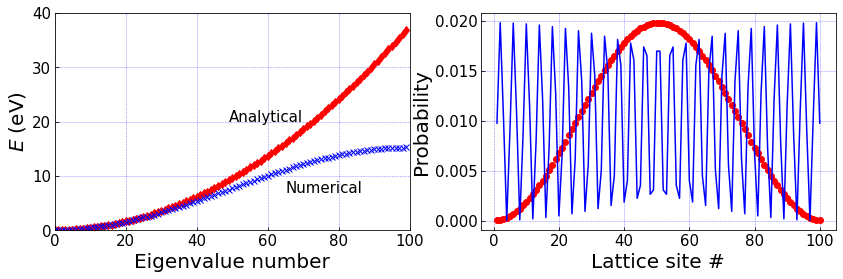

In [7]:
# Analysis (Visualization)
E1 = E[0]; psi1 = V[:,0]; P1 = psi1*np.conj(psi1)
E2 = E[24]; psi2 = V[:,24]; P2 = psi2*np.conj(psi2)
#E2 = E[49]; psi2 = V[:,49]; P2 = psi2*np.conj(psi2)
#print(E1*EU2EV); print(E2*EU2EV)
#print(sum(P1)); print(sum(P1))

# Analytical eigenvalues
Ean = 1/2 * (np.pi/L)**2 * np.arange(1,nx+1)**2

fig = plt.figure(figsize=[14,4])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(Ean*EU2EV,'rd')
ax1.plot(E*EU2EV,'bx')
ax1.set_xlabel('Eigenvalue number',fontsize = 20)
ax1.set_ylabel('$E$ (eV)',fontsize = 20)
ax1.set_xlim(0,100)
ax1.set_ylim(0,40)
ax1.tick_params(axis='both',which='major',labelsize=15,direction='in')
ax1.text(49,20,'Analytical',fontsize=15)
ax1.text(65,7,'Numerical',fontsize=15)
ax1.grid(color='b', alpha=0.5, ls='--',lw=0.5)

ax2.plot(X*EU2ANG,P1,'ro')
ax2.plot(X*EU2ANG,P2,'b')
ax2.set_xlabel('Lattice site #',fontsize = 20)
ax2.set_ylabel('Probability',fontsize = 20)
#plt.xlim(0,100)
#plt.ylim(0,40)
ax2.tick_params(axis='both',which='major',labelsize=15,direction='in')
ax2.grid(color='b', alpha=0.5, ls='--',lw=0.5)